This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

"state", string. 2-letter code of the US state of customer residence <br>
"account_length", numerical. Number of months the customer has been with the current telco provider<br><br>
"area_code", string="area_code_AAA" where AAA = 3 digit area code.<br>
"international_plan", (yes/no). The customer has international plan.<br>
"voice_mail_plan", (yes/no). The customer has voice mail plan.<br>
"number_vmail_messages", numerical. Number of voice-mail messages.<br>
"total_day_minutes", numerical. Total minutes of day calls.<br>
"total_day_calls", numerical. Total minutes of day calls.<br>
"total_day_charge", numerical. Total charge of day calls.<br>
"total_eve_minutes", numerical. Total minutes of evening calls.<br>
"total_eve_calls", numerical. Total number of evening calls.<br>
"total_eve_charge", numerical. Total charge of evening calls.<br>
"total_night_minutes", numerical. Total minutes of night calls.<br>
"total_night_calls", numerical. Total number of night calls.<br>
"total_night_charge", numerical. Total charge of night calls.<br>
"total_intl_minutes", numerical. Total minutes of international calls.<br>
"total_intl_calls", numerical. Total number of international calls.<br>
"total_intl_charge", numerical. Total charge of international calls<br>
"number_customer_service_calls", numerical. Number of calls to customer service<br>
"churn", (yes/no). Customer churn - target variable.<br>
The submissions will be evaluated using the test Accuracy criterion:<br>



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [6]:
# import datasets
train = pd.read_csv(r"C:\Users\BIOLA\Desktop\Data Science Projects\Capstone Project\Dataset\Telecom Churn\train.csv")
test = pd.read_csv(r"C:\Users\BIOLA\Desktop\Data Science Projects\Capstone Project\Dataset\Telecom Churn\test.csv")

In [7]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

### Exploratory Analysis

- Find states with the highest:
1. International Call plan
2. voice_mail_plan
3. total_day_minutes 
4. total_day_calls
5. total_day_charge
6. total_night_calls
7. total_intl_calls
8. total_intl_charge

- Find the state with the highest churn
- Find the relationship between states and account length.
- There are no null values

### Univariate EDA

In [9]:
df = train.copy()

In [10]:
train.select_dtypes('number') # Visualize numerical clumns
train.select_dtypes('number').columns
# train.select_dtypes('object').columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [11]:
# Displaying the categorical distributions
plt.figure(figsize= (14,10))
# plt.bar(train.state, train.total_intl_calls)
# plt.title( 'Total international calls for each state')

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<BarContainer object of 4250 artists>

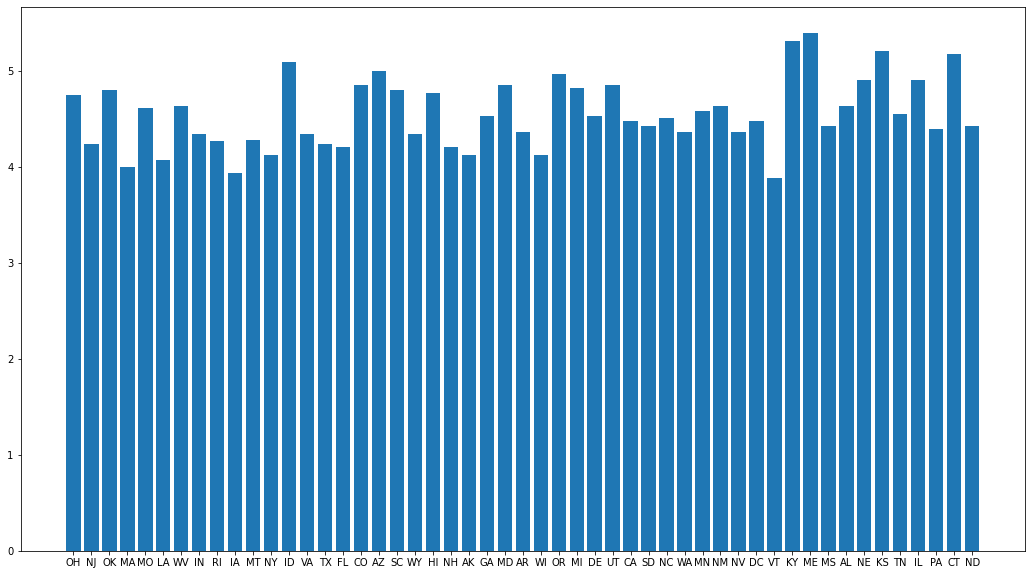

In [12]:
plt.figure(figsize= (18,10))
plt.bar(train.state, train.total_intl_charge)
# plt.title('Total international calls for each state')

In [13]:
plt.figure(figsize= (18,10))
# plt.bar(train.state, train.total_intl_charge)

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

In [14]:
# train.state.value_counts().plot(kind = 'bar', figsize = (18, 11))

### Feature Preprocessing

In [15]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
# from xgboost import XGBClassifier
# from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [16]:
# Make a copy of the data
ds = df.copy()

In [17]:
# Check the columns that are categorical
ds.select_dtypes('object').columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [18]:
# Drop unnecessary columns
ds.drop(['state', 'area_code'], axis = 1, inplace = True)

# Convert the column to numerical column
lb_instatiation = LabelEncoder()
ds.international_plan = lb_instatiation.fit_transform(ds.international_plan)
ds.international_plan.unique()

ds.voice_mail_plan = lb_instatiation.fit_transform(ds.voice_mail_plan)
ds.voice_mail_plan.unique()

ds.churn = lb_instatiation.fit_transform(ds.churn)
ds.churn.unique()


array([0, 1])

In [19]:
# Divide Dataset into features and target
features = ds
target = ds.pop('churn')

In [20]:
# Check the kind of target
from sklearn.utils.multiclass import type_of_target
type_of_target(target)

'binary'

{'whiskers': [<matplotlib.lines.Line2D at 0x14ccb08>,
 'caps': [<matplotlib.lines.Line2D at 0x14cce38>,
 'boxes': [<matplotlib.lines.Line2D at 0x14cc8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x14df1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14df3b8>,
 'means': []}

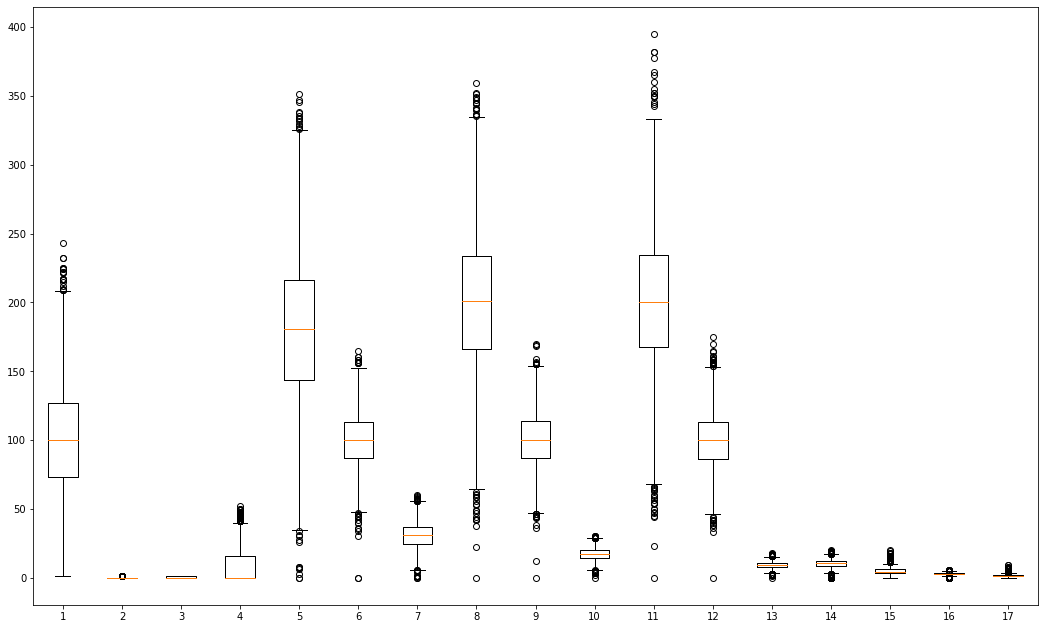

In [21]:
# Checking Outliers 

plt.figure(figsize=(18,11))
plt.boxplot(features)

In [22]:
# Removal of Outliers

def outlier_detect(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        higher = Q3 + 1.5 * IQR
        x = np.array(df[i])
        p = []
        for j in x:
            if j < lower or j > higher:
                p.append(df[i].median())
            else:
                p.append(j)

outlier_detect(features)
        

### Feature Selection

Optimal number of features : 17


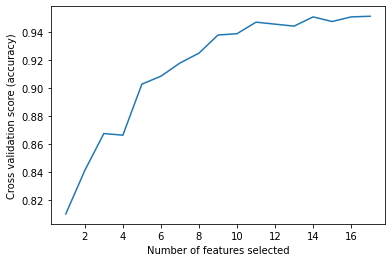

In [23]:
# Using Recursice Feature Selection
# Ascertain the optimal features for the training 
from sklearn.ensemble import RandomForestClassifier
rfe = RandomForestClassifier(random_state = 32) # Instantiate the algo
rfecv  = RFECV(estimator= rfe, step=1, cv=StratifiedKFold(2), scoring="accuracy") # Instantiate the RFECV and its parameters
fit = rfecv.fit(features, target)
print("Optimal number of features : %d" % rfecv.n_features_)
min_features_to_select = 1
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,)
plt.show()

### Train Test Split

In [24]:
train.churn.value_counts()

# With the uneven distribution of 'yes' and 'no' in the target data, its advisable we stratify the target

no     3652
yes     598
Name: churn, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (features, target, test_size = 0.2, random_state= 29, stratify= target)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (3400, 17)
X_test: (850, 17)
y_train: (3400,)
y_test: (850,)


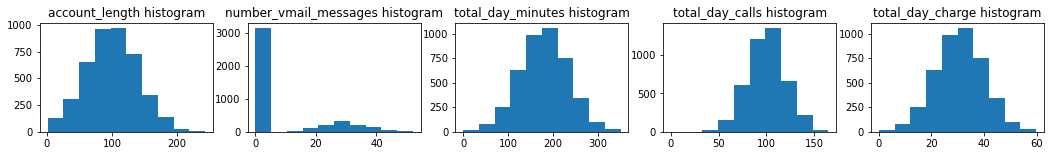

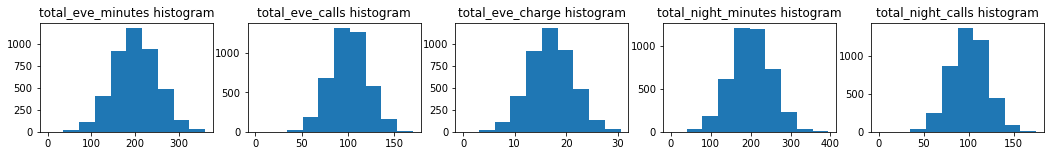

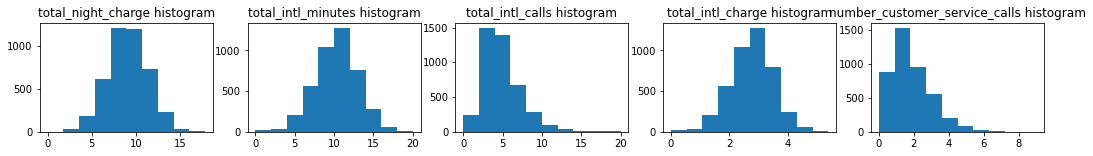

In [26]:
# Standardize or Normalize as required
# We Normalize when the data distribution is not normal
# Test for Normality 

def Normality_Test (a,b,c,d,e):
  plt.figure(figsize=(18,2))
  plt.subplot(1,5,1)
  plt.hist(features[a])
  plt.title(a + ' histogram')

  plt.subplot(1,5,2)
  plt.hist(features[b])
  plt.title(b + ' histogram')

  plt.subplot(1,5,3)
  plt.hist(features[c])
  plt.title(c + ' histogram')

  plt.subplot(1,5,4)
  plt.hist(features[d])
  plt.title(d + ' histogram')

  plt.subplot(1,5,5)
  plt.hist(features[e])
  plt.title(e + ' histogram')

Normality_Test('account_length','number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge')
Normality_Test('total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls')
Normality_Test('total_night_charge', 'total_intl_minutes', 'total_intl_calls',  'total_intl_charge', 'number_customer_service_calls')

In [27]:
from sklearn.preprocessing import MinMaxScaler

xtrain = X_train.copy()
xtest = X_test.copy()
sel_cols = features.columns.tolist()
for i in sel_cols:
    scaler = MinMaxScaler().fit(X_train[[i]])
    xtrain[i] = scaler.transform(X_train[[i]])
    xtest[i] = scaler.transform(X_test[[i]])
     
# Its good practice to fit the scaler on the xtrain only, then transform on the xtrain and xtest.But never transform the ytrain or ytest

In [28]:
xtrain

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
3235,0.239669,0.0,1.0,0.865385,0.202560,0.684848,0.202477,0.650431,0.562130,0.650295,0.352658,0.737143,0.352842,0.700,0.666667,0.700000,0.111111
3419,0.309917,0.0,0.0,0.000000,0.634424,0.660606,0.634371,0.608684,0.573964,0.608710,0.350886,0.720000,0.351154,0.580,0.444444,0.579630,0.222222
1380,0.475207,0.0,0.0,0.000000,0.453485,0.478788,0.453481,0.499583,0.520710,0.499673,0.424810,0.405714,0.424873,0.485,0.111111,0.485185,0.666667
387,0.541322,0.0,1.0,0.692308,0.643528,0.624242,0.643407,0.505427,0.739645,0.505566,0.655190,0.582857,0.655599,0.525,0.277778,0.525926,0.333333
2827,0.276860,0.0,0.0,0.000000,0.657468,0.345455,0.657463,0.426941,0.325444,0.426981,0.484304,0.702857,0.484524,0.480,0.222222,0.479630,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0.528926,0.0,1.0,0.442308,0.599431,0.721212,0.599398,0.382410,0.301775,0.382449,0.628354,0.525714,0.628588,0.395,0.333333,0.394444,0.222222
3215,0.409091,0.0,1.0,0.500000,0.562447,0.484848,0.562416,0.647370,0.491124,0.647348,0.497975,0.685714,0.498030,0.600,0.277778,0.600000,0.111111
3000,0.479339,0.0,0.0,0.000000,0.860882,0.503030,0.860776,0.465071,0.627219,0.464964,0.531139,0.451429,0.531232,0.520,0.388889,0.520370,0.111111
1935,0.194215,0.0,0.0,0.000000,0.489047,0.593939,0.488956,0.442527,0.751479,0.442698,0.353165,0.577143,0.353405,0.380,0.166667,0.379630,0.222222


-----------------------------------------------------------------
### MODELLING

- Support Vector Machine
- RandomForest


In [29]:
# Import Dependencies

from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

-----------------------------------------------------------------------------------------------
## SUPPORT VECTOR MACHINE

In [30]:
svc_model = SVC() # Instantiate the algorithm
svc_model.fit(xtrain, y_train) 

# Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # Instantiate the CV and its parameters
cv_score = cross_val_score(svc_model, xtrain, y_train, scoring='accuracy', cv=cv, n_jobs=-1) # Cross Val score
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_score.mean(), cv_score.std()))

0.91 accuracy with a standard deviation of 0.01


In [31]:
print("CLASSIFICATION MODEL PERFORMANCE")

svc_pred = svc_model.predict(xtest)
svc_eval = print(classification_report(y_test, svc_pred))

print("Mean absolute error(MAE) =", mean_absolute_error(y_test,svc_pred))
print("Mean squared error(MSE) =", mean_squared_error(y_test,svc_pred))
print('R2 score = ', r2_score(y_test,svc_pred) )
print(confusion_matrix(y_test, svc_pred))

CLASSIFICATION MODEL PERFORMANCE
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       730
           1       0.97      0.49      0.65       120

    accuracy                           0.93       850
   macro avg       0.94      0.74      0.81       850
weighted avg       0.93      0.93      0.92       850

Mean absolute error(MAE) = 0.07411764705882352
Mean squared error(MSE) = 0.07411764705882352
R2 score =  0.38869863013698613
[[728   2]
 [ 61  59]]


##### Support Vector Grid Search 

In [32]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf',]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(xtrain, y_train)
print('best parameters: ', grid.best_params_) # print best parameter after tuning
 
# print how our model looks after hyper-parameter tuning
print('best estimator: ', grid.best_estimator_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [33]:
grid_predictions = grid.predict(xtest)
grid_eval = print(classification_report(y_test, grid_predictions))

print("Mean absolute error(MAE) =", mean_absolute_error(y_test,grid_predictions))
print("Mean squared error(MSE) =", mean_squared_error(y_test,grid_predictions))
print('R2 score = ', r2_score(y_test,grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       730
           1       0.84      0.72      0.77       120

    accuracy                           0.94       850
   macro avg       0.90      0.85      0.87       850
weighted avg       0.94      0.94      0.94       850

Mean absolute error(MAE) = 0.058823529411764705
Mean squared error(MSE) = 0.058823529411764705
R2 score =  0.5148401826484017
[[714  16]
 [ 34  86]]


-------------------------------------------------------------------------
## RANDOMFOREST

In [34]:
rf_model = RandomForestClassifier() # instantiate the algorithm
rf_model.fit(xtrain, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # Instantiate the CV and its parameters
rf_cv_score = cross_val_score(rf_model, xtrain, y_train, scoring='accuracy', cv=cv, n_jobs=-1) # Cross Val score
print("%0.2f accuracy with a standard deviation of %0.2f" % (rf_cv_score.mean(), rf_cv_score.std()))

0.96 accuracy with a standard deviation of 0.01


In [35]:
print("CLASSIFICATION MODEL PERFORMANCE")

rf_predict = rf_model.predict(xtest)
rf_eval = print(classification_report(y_test, rf_predict))

print("Mean absolute error(MAE) =", mean_absolute_error(y_test, rf_predict))
print("Mean squared error(MSE) =", mean_squared_error(y_test, rf_predict))
print('R2 score = ', r2_score(y_test, rf_predict))
print(confusion_matrix(y_test, rf_predict))

CLASSIFICATION MODEL PERFORMANCE
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       730
           1       0.98      0.72      0.83       120

    accuracy                           0.96       850
   macro avg       0.97      0.86      0.90       850
weighted avg       0.96      0.96      0.95       850

Mean absolute error(MAE) = 0.042352941176470586
Mean squared error(MSE) = 0.042352941176470586
R2 score =  0.6506849315068493
[[728   2]
 [ 34  86]]


##### Random Forest Random Search

In [36]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
            n_iter = 100, cv = 3, verbose=2, random_state=42, 
            n_jobs = -1) # search across 100 different combinations, and use all available cores
# Fit the random search model
rf_random.fit(xtrain, y_train)
print('best parameters: ', rf_random.best_params_) # print best parameter after tuning

# print how our model looks after hyper-parameter tuning
print('best estimator: ',  rf_random.best_estimator_)
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters:  {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
best estimator:  RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)


In [37]:
print('CLASSIFICATION OF MODEL PERFORMANCE')

rf_random_predict = rf_random.predict(xtest) # Predict using the hyper-parameter tuning
rf_eval = print(classification_report(y_test, rf_random_predict))

print("Mean absolute error(MAE) =", mean_absolute_error(y_test, rf_random_predict))
print("Mean squared error(MSE) =", mean_squared_error(y_test, rf_random_predict))
print('R2 score = ', r2_score(y_test, rf_random_predict))
print(confusion_matrix(y_test, rf_random_predict))

CLASSIFICATION OF MODEL PERFORMANCE
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       730
           1       0.97      0.74      0.84       120

    accuracy                           0.96       850
   macro avg       0.96      0.87      0.91       850
weighted avg       0.96      0.96      0.96       850

Mean absolute error(MAE) = 0.04
Mean squared error(MSE) = 0.04
R2 score =  0.6700913242009132
[[727   3]
 [ 31  89]]


### COMPARISM BETWEEN PREDICTION AND OUTPUT

In [84]:
output = pd.DataFrame(y_test.values, columns= ['Actual Churn'])
rf_out = pd.DataFrame(rf_random_predict, columns= ['RandForest Pred'])
svc_out = pd.DataFrame(grid_predictions, columns= ['SVC Pred'])
Final_out = pd.concat([svc_out, rf_out], axis= 1)
final_output = pd.concat([Final_out, output], axis = 1)


In [106]:
final_output

,SVC Pred,RandForest Pred,Actual Churn
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
845,0,0,0
846,0,0,0
847,0,0,0
848,0,0,0
